Hui-Chun Hung, 2017

# Python Machine Learning Essentials

# Grouping objects by similarity using k-means

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


In [2]:
df = pd.read_csv('player_traditional.csv')
X = df.iloc[:,2:].values

In [3]:
#標準化

sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X)


In [4]:
X_train_std

array([[-1.38091946, -1.02892331, -1.07610715, ..., -0.42723615,
        -0.105789  ,  0.05008138],
       [-0.68491314, -0.56624442, -0.56592013, ..., -0.42723615,
        -0.105789  , -0.0569841 ],
       [ 0.97224477,  0.70612251,  0.82549901, ...,  0.28840018,
        -0.105789  , -0.59231148],
       ..., 
       [ 1.91130091,  1.73062575,  1.75311178, ..., -0.42723615,
        -0.105789  , -0.77075395],
       [ 0.50824055,  0.93746195,  1.2893054 , ...,  1.61743907,
        -0.105789  ,  0.47834329],
       [-0.19881348, -0.38447772, -0.38039758, ..., -0.01830111,
        -0.105789  ,  2.26276792]])

In [5]:
#使用一般的KMean
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X_train_std)
print(km.labels_)

[1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 2 0 0 0 0 1 2 1 1 2 1 0 1 1 1 0 0 0
 1 1 1 1 0 2 1 1 1 0 1 2 1 1 0 0 0 1 1 1 1 2 1 1 0 1 2 0 1 1 0 2 1 0 1 1 1
 1 1 2 1 0 0 1 1 0 0 1 0 1 1 1 2 1 1 2 0 0 1 1 0 1 0 1 0 1 1 1 2 1 1 2 2 0
 1 1 1 2 1 0 0 1 0 1 2 1 0 1 1 0 0 0 1 1 1 1 2 2 0 2 0 1 1 0 1 0 0 2 0 0 0
 0 0 1 0 0 1 1 0 1 1 1 0 2 1 2 2 0 0 1 0 2 1 1 1 0 0 1 1 2 0 0 1 0 0 0 0 1
 2 0 0 1 1 0 0 0 0 2 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 2 1 1 0 0 1 0 2 0 0 0 0
 0 1 1 1 2 1 0 1 1 2 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 2 1 0 1 0 1 0 0 0 1 2
 2 1 0 0 2 0 0 0 2 2 1 1 0 2 0 1 1 2 1 0 2 0 1 1 2 2 1 1 1 1 0 1 1 2 1 0 1
 0 1 1 0 1 0 1 1 1 0 2 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 2 1
 1 1 1 1 1 1 1 0 0 2 0 0 0 1 0 2 1 1 0 2 0 2 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0
 0 2 2 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 2 0 0 0 0 1 1 0 1 1 2 2 2 0 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 2 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0]


In [6]:
#使用k-means++

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0).fit(X_train_std)

# 印出分群結果
print("分群結果：")
print(km.labels_)
print("----------我是分隔線----------")



分群結果：
[1 1 2 1 1 2 1 2 1 2 1 1 2 2 1 2 1 2 1 0 2 2 2 2 1 0 1 1 0 1 2 1 1 1 1 2 2
 1 1 1 1 2 0 1 1 1 2 1 0 1 1 2 2 2 1 1 1 1 0 1 1 2 1 0 2 1 1 2 0 1 2 1 1 1
 1 1 0 1 2 2 1 1 2 2 1 2 1 1 1 0 1 1 0 2 2 1 1 2 1 2 1 2 1 1 1 0 1 1 0 0 2
 1 1 1 0 1 2 2 1 2 1 0 1 2 1 1 2 2 2 1 1 1 1 0 0 2 0 2 1 1 2 1 2 2 0 2 2 2
 2 2 1 2 2 1 1 2 1 1 1 2 0 1 0 0 2 2 1 2 0 1 1 1 2 2 1 1 0 2 2 1 2 2 2 2 1
 0 2 2 1 1 2 2 2 2 0 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 0 1 1 2 2 1 2 0 2 2 2 2
 2 1 1 1 0 1 2 1 1 0 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 2 0 1 2 1 2 1 2 2 2 1 0
 0 1 2 2 0 2 2 2 0 0 1 1 2 0 2 1 1 0 1 2 0 2 1 1 0 0 1 1 1 1 2 1 1 0 1 2 1
 2 1 1 2 1 2 1 1 1 2 0 1 2 2 1 2 2 1 1 2 2 2 1 2 2 2 2 2 1 1 1 2 2 1 2 0 1
 1 1 1 1 1 1 1 2 2 0 2 2 2 1 2 0 1 1 2 0 2 0 1 2 1 1 1 1 2 2 1 1 1 2 1 2 2
 2 0 0 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 0 2 2 2 2 1 1 2 1 1 0 0 0 2 1 1
 1 1 2 1 2 2 2 1 1 1 2 1 2 2 2 2 1 1 0 1 1 2 2 2 2 2 1 2 2 1 2 2 1 1 1 2 2
 1 2 1 2 1 1 2 2 2 1 2 2 1 1 2 1 1 2 1 2 1 1 2 2 1 1 2 2 1 2 1 1 2 2 2 1 2
 2 2 2 2 2]
-------

In [7]:
new_df = pd.read_csv('player_traditional2.csv')

In [9]:
#Performing hierarchical clustering on a distance matrix
row_dist = pd.DataFrame(squareform(pdist(new_df, metric='euclidean')))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,476,477,478,479,480,481,482,483,484,485
0,0.000000,38.003026,44.131961,64.743108,41.630878,50.222306,60.915762,39.843695,35.474780,57.456331,...,50.548294,42.764237,58.465887,33.223787,42.719668,45.889650,45.581685,55.680697,51.409240,63.014205
1,38.003026,0.000000,24.186360,63.931682,20.042954,26.385413,39.419031,21.531140,9.675226,46.161889,...,24.553208,20.523401,43.330474,32.628055,23.384610,27.352331,14.973310,31.271233,32.829864,41.296005
2,44.131961,24.186360,0.000000,66.348323,27.987497,13.263107,34.273313,10.673800,26.274512,35.846618,...,16.945796,10.549408,32.659914,27.395803,15.614737,7.655717,18.197802,20.919608,16.379866,34.913894
3,64.743108,63.931682,66.348323,0.000000,53.101601,75.960582,58.736360,63.004524,55.751682,57.789272,...,72.197368,70.576129,59.521845,64.018044,67.526735,71.724682,70.424144,81.060533,66.230356,63.372391
4,41.630878,20.042954,27.987497,53.101601,0.000000,35.650947,23.744473,28.129877,13.741543,30.828883,...,36.116755,31.004355,28.479642,25.183526,21.835293,34.175869,29.908527,42.728796,31.756889,27.045517
5,50.222306,26.385413,13.263107,75.960582,35.650947,0.000000,42.306619,16.069225,32.222663,45.474498,...,14.286707,11.033585,42.284749,36.444753,21.788759,9.573923,16.341665,14.776332,21.491161,41.044488
6,60.915762,39.419031,34.273313,58.736360,23.744473,42.306619,0.000000,38.870683,35.493521,20.251913,...,44.402252,41.077123,13.306765,33.748333,29.465913,40.636560,42.441254,48.522057,33.440395,10.723805
7,39.843695,21.531140,10.673800,63.004524,28.129877,16.069225,38.870683,0.000000,23.487443,40.654028,...,16.221282,11.559412,38.106692,29.427538,20.306403,13.222708,16.570154,23.512975,22.520879,39.134256
8,35.474780,9.675226,26.274512,55.751682,13.741543,32.222663,35.493521,23.487443,0.000000,41.382243,...,30.046131,25.681511,39.133617,29.502542,23.932196,31.147392,22.076005,37.743079,33.451009,38.574473
9,57.456331,46.161889,35.846618,57.789272,30.828883,45.474498,20.251913,40.654028,41.382243,0.000000,...,50.754901,45.189933,9.921189,28.870227,29.196233,41.474932,49.537662,54.810309,29.861011,20.237589


In [10]:
# correct approach: Condensed distance matrix
row_clusters = linkage(pdist(new_df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,38.0,378.0,1.232883,2.0
cluster 2,224.0,346.0,2.220360,2.0
cluster 3,10.0,433.0,2.854820,2.0
cluster 4,77.0,211.0,3.000000,2.0
cluster 5,266.0,476.0,3.132092,2.0
cluster 6,8.0,349.0,3.203123,2.0
cluster 7,298.0,376.0,3.443835,2.0
cluster 8,82.0,137.0,3.466987,2.0
cluster 9,373.0,415.0,3.514257,2.0
cluster 10,115.0,339.0,3.536948,2.0


In [11]:
row_clusters

array([[  38.        ,  378.        ,    1.2328828 ,    2.        ],
       [ 224.        ,  346.        ,    2.22036033,    2.        ],
       [  10.        ,  433.        ,    2.85482048,    2.        ],
       ..., 
       [ 964.        ,  966.        ,  113.75047253,  465.        ],
       [ 113.        ,  967.        ,  134.79851631,   21.        ],
       [ 968.        ,  969.        ,  138.24485524,  486.        ]])

In [12]:
f = open('player.txt','r')
label = f.read().split('\n')

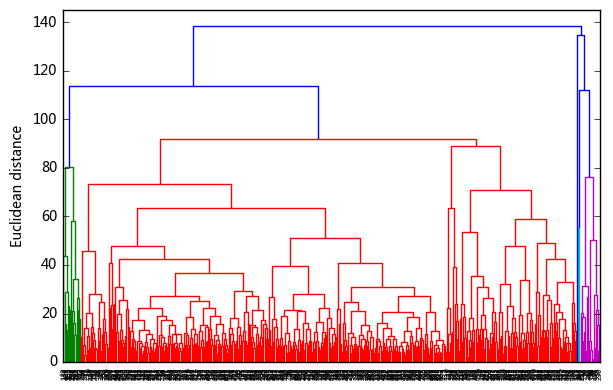

In [15]:
row_dendr = dendrogram(row_clusters, 
                       labels=df.index)
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('dendrogram.png', dpi=3000, 
#            bbox_inches='tight')
plt.show()

In [ ]:
#Attaching dendrograms to a heat map
fig = plt.figure(figsize=(100,100))
axd = fig.add_axes([0.07,0.1,0.2,0.6]) #設定X Y 軸 位置 高度 寬度
row_dendr = dendrogram(row_clusters, orientation='left') #right 將樹狀圖以逆時針轉90度

#dendrogram樹狀圖物件本身是個字典的leaves鍵，藉此可以讀到集群標籤
df_rowclust = new_df.ix[row_dendr['leaves'][::-1]]

axd.set_xticks([]) 
axd.set_yticks([])
#移除掉軸的刻度以便修改熱度圖的顏色
# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)
        
# plot heatmap

axm = fig.add_axes([0.1,0.1,0.27,0.6]) # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r') #將重新排列的dataframe把入熱度圖
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_xticks(np.linspace(0,22,23))
axm.set_yticklabels(label)
axm.set_yticks(np.linspace(0,485,486))
# plt.savefig('./figures/heatmap.png', dpi=300)
plt.xticks(rotation=90)
plt.show()
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')